# Assignment 3

## Integrating a Ball of Test Particles

In this assignment, we're going to try to visualize with some plots what we worked out in Assignment 2. If you recall from that assignment, we figured out how particles on different sides of the satellite would be orbit differently around the host galaxy. The stars outside the tidal radius get stripped and start to form a stream.

To try to implement this process, we are going to use a set of *test particles* to describe stars. Test particles are particles to which we assign no mass. This means that although they are being accelerated by the gravitational potential of the host galaxy, they do not accelerate the galaxy in return. They are used because they are good approximation in this case, given that the mass of an individual star is $\approx 10^{12}$ times less than the mass of the galaxy.

Note that this does mean the tidal radius is no longer a quantity with physical meaning since it relies on the satellite having mass and interacting with the particles that populate it. We will be able to get around this problem when we use Gala, but for now, the following exercise is still a useful one to perform since it does help to visualize the formation of a stream.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's make our test particles have a distribution resembling a Gaussian ball. This just specifies how we want to distribute all our particles in space. In essence we will put more particles in the center than on the outskirts, which is the case for a real satellite. If you would like to learn more about Gaussian distributions more generally, there are tons of resources but here is one that has examples in python: https://vitalflux.com/normal-distribution-explained-python-examples/


In [22]:
n_stars = 1000
x_part = np.random.normal(30, 0.2, size = n_stars) # tell numpy to arange my 1000 particles to have a mean x-position of 30 with 
y_part = np.random.normal(0, 0.2, size = n_stars) # average y position of 0

Make a couple of plots to visualize this distribution of stars. Notice the difference in the axes limits in the bottom two plots.

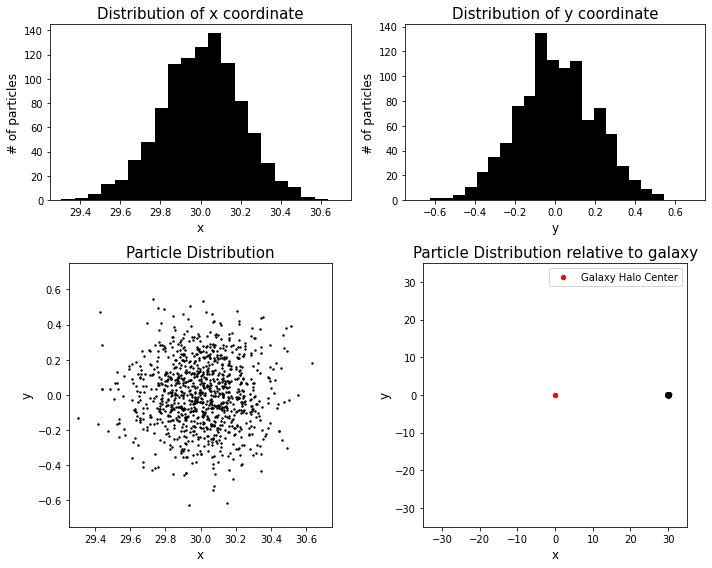

In [27]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize = (10, 8), gridspec_kw={'height_ratios': [1, 1.5]})

ax1.hist(x_part, bins = 20, color='k')
ax1.set_xlabel(r'x', fontsize = 12)
ax1.set_ylabel(r'# of particles', fontsize = 12)
ax1.set_xlim(29.25, 30.75)
ax1.set_title(r'Distribution of x coordinate', fontsize = 15)

ax2.hist(y_part, bins = 20, color='k')
ax2.set_xlabel(r'y', fontsize = 12)
ax2.set_ylabel(r'# of particles', fontsize = 12)
ax2.set_xlim(-0.75, 0.75)
ax2.set_title(r'Distribution of y coordinate', fontsize = 15)

ax3.scatter(x_part, y_part, c = 'k', s = 2)
ax3.set_xlabel(r'x', fontsize = 12)
ax3.set_ylabel(r'y', fontsize = 12)
ax3.set_xlim(29.25, 30.75)
ax3.set_ylim(-0.75, 0.75)
ax3.set_title(r'Particle Distribution', fontsize = 15)
ax3.set_aspect('equal')

ax4.scatter(x_part, y_part, c = 'k', s = 1)
ax4.scatter(0,0, c='r', s = 20, label='Galaxy Halo Center')
ax4.set_xlabel(r'x', fontsize = 12)
ax4.set_ylabel(r'y', fontsize = 12)
ax4.set_xlim(-35, 35)
ax4.set_ylim(-35, 35)
ax4.set_title(r'Particle Distribution relative to galaxy', fontsize = 15)
ax4.set_aspect('equal')
ax4.legend()

fig.tight_layout()
plt.show()

### Setup Code

Since we will be integrating orbits, copy your functions for the Hernquist potential from the previous assignments that are relevant for doing so.

In [28]:
# copy your previous code here



### Exercise 1:

Assume that the host galaxy has mass $10^{12}$, scale radius 15, and has a Hernquist profile. What is the circular velocity of each of these stars? Make a scatter plot of the stars as in the bottom left plot above and color the points by their circular velocity with a color bar. Check the advanced techniques part of the Plotting Tutorial notebook if you aren't sure how to do this. Do you notice anything?

In [29]:
G = 6.67e-11
M = 1e12
c = 15
# your code here



### Exercise 2:

Integrate the orbits of each of these stars in a Hernquist potential with scale radius 3. Initialize the conditions such that each star is on a circular orbit. Make sure you integrate them long enough for the stars to go around the galaxy $\sim 10$ times. You may want to use problem 2 in Assignment 2 as a guide to figure out what that time is.

Plot the distribution of stars at the end of the integration in a scatter plot side by side with the initial distribution.

**Coding note:** This is a non-trivial probelm to code because you have to keep track of all the particles at every timestep. You can either write some loops and figure out a way to save them (this will be much slower)
or you can apply the Leapfrog integrator to all the particles at once. To do this, you should make a matrix for each position, velocity, and acceleration component, as well as one for the energy. Here is an example for the $x$-position matrix:
$$
\begin{equation*}
\Biggl(
\begin{matrix}
x_{0,0} & x_{0,1} & \cdots & x_{0,T} \\
x_{1,0} & x_{1,1} & \cdots & x_{1,T} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{N,0} & x_{N,1} & \cdots & x_{N,T} \\
\end{matrix}
\Biggr)
\end{equation*}
$$
where $x_{i,j}$ is the $x$-position of the $i$-th particle at the $j$-th timestep. $T$ is the total number of timesteps and $N$ is the total number of particles.

In words, each row in your matrix should correspond to the arrays you built in the leapfrog integrator notebook (in other words, each row represents one particle). Each column represents one time of integration (in other words, if you select the first column, you should get the initial position/velocity/acceleration/energy of every particle and if you select the last column,  you should get the final position/velocity/acceleration/energy of every particle). As in the leapfrog integrator notebook, you should start with a matrix of zeros, and fill it in as you integrate the orbit in the for loop.

I've given an example of the starting point for the x-position below. 

*Note:* If you've never coded something like this before, this is likely going to be challenging to figure out. Do not worry if it is taking you a while. We encourage you to use each other as resources on this before you reach out to the mentors for advice.

In [31]:
# Here is an example of the setup for the x position:
# Note: this bit of code should come after you define t as in the leapfrog integrator notebook

x = np.zeros((n_stars, len(t))) # n_stars rows and len(t) columns
x[:, 0] = x_part

# your code here, follow the guide of the x-position to figure out the matrices for the other variables


### Exercise 3:

Plot the final distribution of stars again, but this time color the points by their energy. Recall from Assignment 2 that $$E = \frac{1}{2} v_{circ}^2 + \Phi(R)$$ where $\Phi$ represents the Hernquist potential.

Also color the final distribution of stars by their time period. Use your code/formulas from Assignment 2 to get the periods.

In [ ]:
# your code here

Refer back to your answer to Problem 3 in Assignment 2. How does the length of your integrated stream here compare to the length you predicted? What are the differences in the two setups that would lead to any changes?

Also - explain in your own words why, given their orbital properties, certain particles are "leading" and others are "trailing". And how does this help you understand formation of streams

### Exercise 4:

Go back and vary the initial conditions of the ball of particles. Note that in this case, this means the mean position of the ball and possibly the standard deviation defining how the ball is distributed around that mean. Observe how things change. Could you set up this code so that you can match the length of the integrated stream to what you predicted in Assignment 2?

One specific initial condition you could try is to use the same masses as one of the configurations in Assignment 2 and make the standard deviation the same as the tidal radius from Assignment 2.

## Making a Movie

Here is some code that will make a movie of the particles spreading out. You are welcome to try to implement this on your own, but it is not worth spending too much time on, so we are providing the code for you.

In [38]:
# you may need to change some variable names: x is the matrix of x-positions, y is the matrix of y-positions,
#                                             dt is the timestep

from matplotlib.animation import FuncAnimation

def animate(i) :
    ax1.clear()
    
    ax1.scatter(x[:,i],y[:,i], c='k', s=2)
    ax1.set_xlim(-35, 35)
    ax1.set_ylim(-35, 35)
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    
    plt.suptitle(r'Time = {}'.format(np.around(i*dt, 1)))
    plt.tight_layout()
    plt.draw()

In [ ]:
# You may need to change N, it should be the total number of steps in your orbit integration

# I think the animation will be very slow, but let it run for a while and you should see a stream form

%matplotlib notebook
fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
anim = FuncAnimation(fig, animate, frames = int(N), #N should be the number of steps in your orbit integration
                              interval = 1, blit = True) #interval is the display animation speed


## Extra Stuff:

If you are interested and have extra time, you could try one of the following:

1. Implement what we've done so far in three dimensions instead of two. You will need to add some modifications to nearly everything we've done so far, starting with defining the potentials to include a z-coordinate. To plot, you can either plot in 3d or plot in multiple combinations of two coordinates (e.g. x-y, y-z, x-z)

2. Start taking a look at the Gala website (http://gala.adrian.pw/en/latest/). You should be able to understand what is in the documentation better now that you have built some of that code yourself!